# BAX 452 001-002 WQ 2024 Machine Learning
# Assignment 1
# Group 5
# Hitesh Kunchakuri, Shivank Chandra, Richard Liu

In [50]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import kstest

In [51]:
directory_path = '/Users/hiteshkunchakuri/Downloads/Winter - Machine Learning/HW 1'
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/hiteshkunchakuri/Downloads/Winter - Machine Learning/HW 1


1. Data Exploration and Visualization: Explore the “fundamentals.csv”. Include any other plots you find interesting.

In [52]:
fundamentals = 'fundamentals.csv'
fundamentals_df = pd.read_csv(fundamentals)
fundamentals_df.dropna(inplace=True)
fundamentals_df.tail()
fundamentals_df.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1299.000000,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,...,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1299.000000,1.299000e+03
mean,900.877598,3.709840e+09,-7.364829e+07,8.845911e+07,47.234796,-1.471495e+09,4.248825e+09,73.934565,1.820352e+09,-8.116966e+07,...,8.085596e+09,5.637950e+09,9.537915e+09,1.712867e+10,2.666659e+10,2.134803e+10,-4.399277e+09,2013.219400,3.319923,5.807538e+08
std,507.943350,7.463106e+09,5.304388e+08,7.583589e+08,249.888806,3.380823e+09,8.643626e+09,100.580915,3.072288e+09,4.218345e+08,...,1.447895e+10,1.001800e+10,1.824904e+10,2.844549e+10,4.361829e+10,4.489432e+10,1.605909e+10,22.193998,5.016596,9.966520e+08
min,0.000000,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,5.804150e+08,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,481.000000,6.342590e+08,-1.010000e+08,-3.427000e+06,11.000000,-1.399000e+09,3.534500e+08,16.000000,2.970000e+08,-7.323100e+07,...,1.814450e+09,1.085870e+09,2.076000e+09,3.311690e+09,6.165850e+09,4.123165e+09,-3.186500e+09,2013.000000,1.590000,1.437613e+08
50%,904.000000,1.388700e+09,-2.101900e+07,4.000000e+06,18.000000,-4.299870e+08,1.506000e+09,41.000000,8.270000e+08,-2.153000e+06,...,3.494000e+09,2.357200e+09,4.307075e+09,7.848200e+09,1.294400e+10,8.205088e+09,-3.381500e+08,2014.000000,2.790000,2.855204e+08
75%,1339.500000,3.261234e+09,1.710000e+07,3.780000e+07,28.000000,-1.563680e+08,5.044000e+09,89.000000,1.963500e+09,0.000000e+00,...,7.832350e+09,5.356500e+09,9.816950e+09,1.864400e+10,3.098300e+10,1.749658e+10,0.000000e+00,2015.000000,4.500000,5.570089e+08
max,1779.000000,6.067100e+10,4.692000e+09,1.416200e+10,5789.000000,0.000000e+00,9.110800e+10,1041.000000,5.352800e+10,2.658000e+09,...,1.396600e+11,8.233600e+10,1.743990e+11,2.800010e+11,4.026720e+11,4.856510e+11,0.000000e+00,2016.000000,50.090000,8.419048e+09


In [53]:
fundamentals_df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [54]:
fundamentals_df = fundamentals_df.dropna(subset=['Estimated Shares Outstanding'])

In [55]:
fundamentals_df.drop(columns=['Unnamed: 0','Ticker Symbol','Period Ending'],axis=1,inplace=True)

In [56]:
fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1779
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1299 non-null   float64
 1   Accounts Receivable                                  1299 non-null   float64
 2   Add'l income/expense items                           1299 non-null   float64
 3   After Tax ROE                                        1299 non-null   float64
 4   Capital Expenditures                                 1299 non-null   float64
 5   Capital Surplus                                      1299 non-null   float64
 6   Cash Ratio                                           1299 non-null   float64
 7   Cash and Cash Equivalents                            1299 non-null   float64
 8   Changes in Inventories                               1299 non-null   floa

In [57]:
null_count = fundamentals_df['Estimated Shares Outstanding'].isnull().sum()
print(null_count)

0


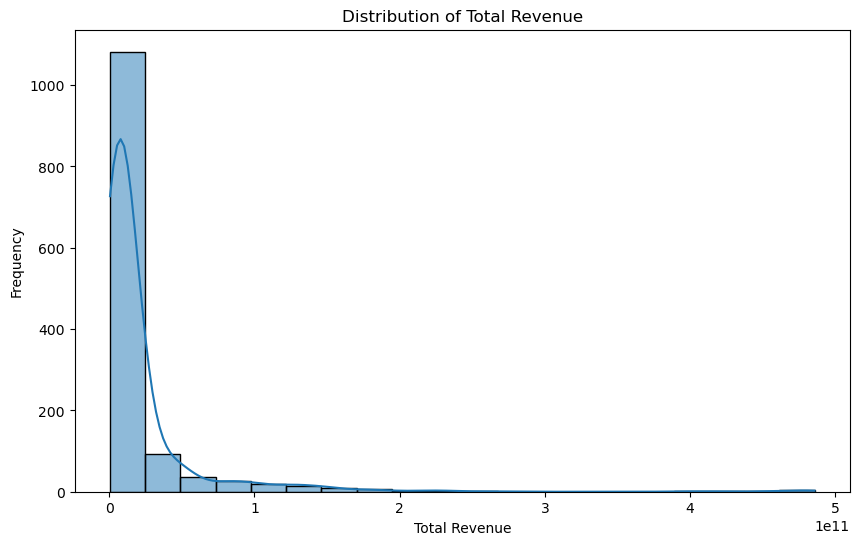

In [58]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(fundamentals_df['Total Revenue'], bins=20, kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

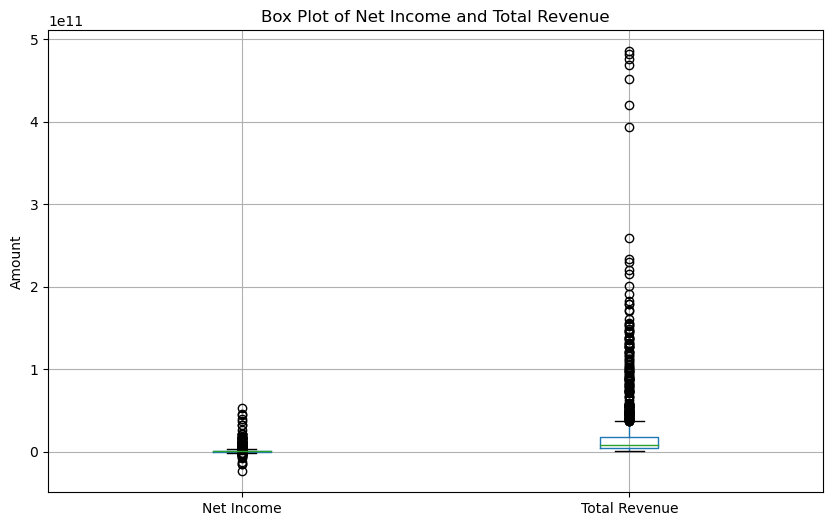

In [59]:
# Box Plot
fundamentals_df.boxplot(column=['Net Income','Total Revenue'], figsize=(10, 6))
plt.title('Box Plot of Net Income and Total Revenue')
plt.ylabel('Amount')
plt.show()

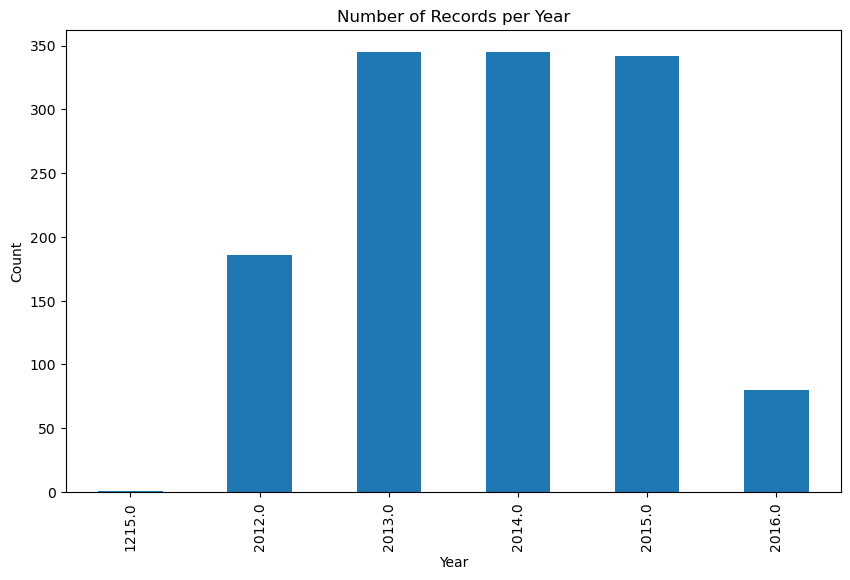

In [60]:
# Bar Graph
fundamentals_df['For Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

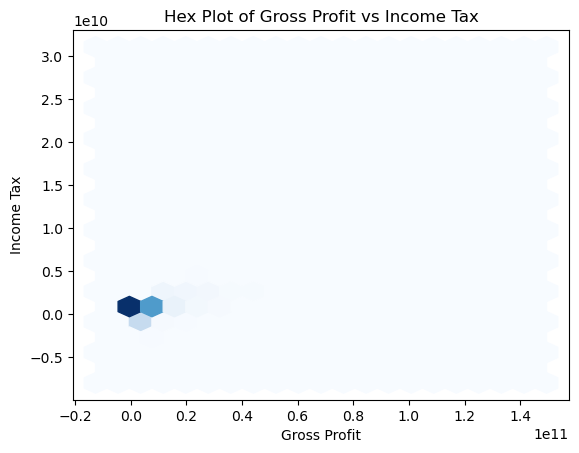

In [61]:
# Hex Plot
plt.hexbin(fundamentals_df['Gross Profit'], fundamentals_df['Income Tax'], gridsize=20, cmap='Blues')
plt.title('Hex Plot of Gross Profit vs Income Tax')
plt.xlabel('Gross Profit')
plt.ylabel('Income Tax')
plt.show()

Observations about the Dataset:

We have visualized the in dataset different kinds of plots like Histogram, Box Plot, Bar Graph and Hex Plot.

Have considered different columns from the given dataset to plot.

Distribution of Total Revenue is Right skewed.

Box plot for Net Income and Total Revenue shows different patterns.

All the data around IQR for Net Income whereas some data points of Total Revenue are far from the IQR possibly outliers.

Bar Graph is plotted for Count of records per year which is higher and almost equal across the years 2013,2014 and 2015.

Hex Plot is Gross Profit against Income Tax, More density is observed when both values are approximately zero.

2. Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding. Explain your model.

In [62]:
fundamentals_df_new = fundamentals_df.drop(['Estimated Shares Outstanding'], axis=1)

In [63]:
fundamentals_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1779
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1299 non-null   float64
 1   Accounts Receivable                                  1299 non-null   float64
 2   Add'l income/expense items                           1299 non-null   float64
 3   After Tax ROE                                        1299 non-null   float64
 4   Capital Expenditures                                 1299 non-null   float64
 5   Capital Surplus                                      1299 non-null   float64
 6   Cash Ratio                                           1299 non-null   float64
 7   Cash and Cash Equivalents                            1299 non-null   float64
 8   Changes in Inventories                               1299 non-null   floa

In [64]:
# Add a constant term to the independent variable
X = fundamentals_df_new

# Define the dependent variable
y = fundamentals_df['Estimated Shares Outstanding']

model = smf.ols(formula='y ~ X',data=fundamentals_df).fit()
# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     98.40
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:44:05   Log-Likelihood:                -27507.
No. Observations:                1299   AIC:                         5.516e+04
Df Residuals:                    1225   BIC:                         5.554e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.312e+08      1e+09      0.729      0.4

Original Model:

For the model building we have excluded the variables 'Ticker Symbol' and 'Period Ending'.

All other values are regressed against dependent variable 'Estimated Shares Outstanding'.

R-squared: 0.854 indicates that 85.4 variability of 'Estimated Shares Outstanding' is explained by different variables in 'x'.

Kurtosis: 68.944 indicates Leptokurtic distribution, have lot of outliers.

3. Multicollinearity in Linear Regression: Explain how multicollinearity can affect the interpretation of a linear regression model's coefficients.

Multicollinearity in a regression model is when two independent variables are highly correlated between each other, it is difficult to remove the effect of each of the variable on the dependent variable.
Correlation coefficient of +1 or -1 said to be perfectly collinear(rare case).
When the multicollinearity is present, the regression coefficients become large and can not be predicted with great precision or accuracy.
Regression Estimators will have large variances, wider confidence intervals due to large standard errors, High R-squared values.
Regression Estimators will become sensitive to small changes in the data and becomes difficult to interpret the individual contribution.

4. P-Value Analysis and Histogram: Create a histogram of the p-values. Is there any skewedness? Provide your explanation.

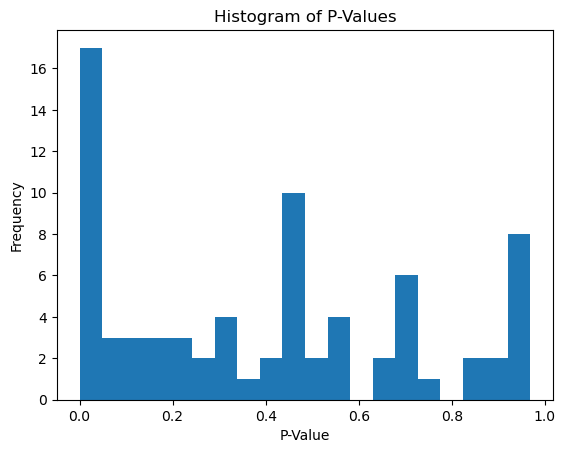

In [65]:
# Get p-values and create a histogram
p_values = model.pvalues[1:]  # Exclude the constant term
plt.hist(p_values, bins=20)
plt.title('Histogram of P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

In [66]:
from scipy.stats import kstest

ks_statistic, ks_pvalue = kstest(p_values, 'uniform')

ks_statistic, ks_pvalue

(0.18111968288034036, 0.01263894566705781)

Histogram of p-values plotted shows it is Right or Positively skewed. 
There are large number of variables with p-value less than 0.05, statistically significant supporting to reject the null hypothesis.
As the p-value increases the variables support weaknes against the null hypothesis, becomes stastically insignificant.

5. False Discovery Rate Control with BH Procedure: Given the p values you find, use the BH procedure to control the FDR with a q of 0.1. How many “true” discoveries do you estimate?

In [67]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  
  return alpha


alpha_threshold = fdr(p_values, q=0.1)
lst = [i for i in p_values if i <= alpha_threshold]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 7


Number of True Discoveries are 7

6. Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables?

In [68]:
alpha_threshold = fdr(p_values, q=0.1)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.1, Number of True Discoveries: {len(lst)}')

For Alpha = 0.1, Number of True Discoveries: 7


In [69]:
alpha_threshold = fdr(p_values, q=0.15)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.15, Number of True Discoveries: {len(lst)}')

For Alpha = 0.15, Number of True Discoveries: 8


In [70]:
alpha_threshold = fdr(p_values, q=0.2)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.2, Number of True Discoveries: {len(lst)}')

For Alpha = 0.2, Number of True Discoveries: 10


In [71]:
alpha_threshold = fdr(p_values, q=0.25)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.25, Number of True Discoveries: {len(lst)}')

For Alpha = 0.25, Number of True Discoveries: 17


In [72]:
alpha_threshold = fdr(p_values, q=0.3)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.3, Number of True Discoveries: {len(lst)}')

For Alpha = 0.3, Number of True Discoveries: 19


In [73]:
alpha_threshold = fdr(p_values, q=0.35)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.35, Number of True Discoveries: {len(lst)}')

For Alpha = 0.35, Number of True Discoveries: 20


In [74]:
alpha_threshold = fdr(p_values, q=0.4)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.4, Number of True Discoveries: {len(lst)}')

For Alpha = 0.4, Number of True Discoveries: 21


In [75]:
alpha_threshold = fdr(p_values, q=0.45)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.45, Number of True Discoveries: {len(lst)}')

For Alpha = 0.45, Number of True Discoveries: 23


In [76]:
alpha_threshold = fdr(p_values, q=0.5)
lst = [i for i in p_values if i <= alpha_threshold]
print(f'For Alpha = 0.5, Number of True Discoveries: {len(lst)}')

For Alpha = 0.5, Number of True Discoveries: 24


In [77]:
data = {'Alpha': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],
        'Number of True Discoveries': [7,8,10,17,19,20,21,23,24]}
Senstivity = pd.DataFrame(data)
Senstivity

,Alpha,Number of True Discoveries
0,0.10,7
1,0.15,8
2,0.20,10
3,0.25,17
4,0.30,19
5,0.35,20
6,0.40,21
7,0.45,23
8,0.50,24


For the sensitivity analysis of FDR control, we have considered the q values for the range of 0.1-0.5.
From the above table, we can see that as the value of q increases, number of true discoveries are also increasing which indicates number of independent variables which are significant increases with increase in q value.
The values at lower q values are more robust compared to that of higher q values.

7. Exploring Interaction Terms:                                                                                   a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model.                                                                                  b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics.

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
fundamentals_df_latest = fundamentals_df.iloc[:, :25]
# Display the selected columns
fundamentals_df_latest.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5.496000e+09,4.616000e+09,0.0,0.0,2.751000e+10,4.091000e+09,73.0,2.989400e+10,-2.994000e+09,2.249000e+09
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,6.579150e+08,6.240740e+08,0.0,0.0,1.292547e+09,7.638900e+07,50.0,3.098036e+09,2.364040e+08,2.884500e+07


In [80]:
fundamentals_df_latest.shape

(1299, 25)

In [81]:
poly = PolynomialFeatures(degree=2)

interaction = poly.fit_transform(fundamentals_df_latest)
interaction_feature_names = poly.get_feature_names_out(fundamentals_df_latest.columns)
interaction_df = pd.DataFrame(interaction, columns=interaction_feature_names)
interaction_df

,1,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Gross Margin^2,Gross Margin Gross Profit,Gross Margin Income Tax,Gross Margin Intangible Assets,Gross Profit^2,Gross Profit Income Tax,Gross Profit Intangible Assets,Income Tax^2,Income Tax Intangible Assets,Intangible Assets^2
0,1.0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,...,3364.0,8.326480e+11,-3.300200e+10,5.040200e+10,2.060947e+20,-8.168564e+18,1.247536e+19,3.237610e+17,-4.944610e+17,7.551610e+17
1,1.0,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,...,3481.0,9.277160e+11,-2.041400e+10,1.363490e+11,2.472442e+20,-5.440504e+18,3.633816e+19,1.197160e+17,-7.996060e+17,5.340721e+18
2,1.0,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,...,3969.0,1.702890e+12,2.079000e+10,1.411200e+11,7.306209e+20,8.919900e+18,6.054720e+19,1.089000e+17,7.392000e+17,5.017600e+18
3,1.0,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,...,5329.0,2.182262e+12,-2.185620e+11,1.641770e+11,8.936512e+20,-8.950264e+19,6.723161e+19,8.964036e+18,-6.733506e+18,5.058001e+18
4,1.0,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,...,2500.0,1.549018e+11,1.182020e+10,1.442250e+09,9.597827e+18,7.323881e+17,8.936285e+16,5.588685e+16,6.819073e+15,8.320340e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1.0,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,-164600000.0,...,5329.0,2.504265e+11,1.607460e+10,4.405550e+10,1.176833e+19,7.553961e+17,2.070307e+18,4.848804e+16,1.328907e+17,3.642122e+17
1295,1.0,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,-205400000.0,...,4900.0,2.938040e+11,4.900000e+08,6.122410e+11,1.761649e+19,2.938040e+16,3.670997e+19,4.900000e+13,6.122410e+16,7.649776e+19
1296,1.0,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,...,3969.0,1.821960e+11,1.178100e+10,5.058900e+10,8.363664e+18,5.408040e+17,2.322276e+18,3.496900e+16,1.501610e+17,6.448090e+17
1297,1.0,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,...,4096.0,1.963520e+11,1.491200e+10,4.652800e+10,9.412624e+18,7.148440e+17,2.230436e+18,5.428900e+16,1.693910e+17,5.285290e+17


In [82]:
# building another linear regression

model_new=smf.ols(data=fundamentals_df_new,formula= 'y~interaction_df.values').fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.58
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:44:13   Log-Likelihood:                -26886.
No. Observations:                1299   AIC:                         5.440e+04
Df Residuals:                     983   BIC:                         5.604e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0004      0.000      1.583      0.114   -8.81e-05       0.001
interaction_df.values[0]       0.0128      0.008      1.669      0.095      -0.002       0.028
interaction_df.values[1]      -0.0736      0.046     -1.602      0.109      -0.164       0.017
interaction_df.values[2]      -0.5135      0.286     -1.796      0.073      -1.075       0.048
interaction_df.values[3]       0.1010      0.271      0.373      0.709      -0.430       0.632
interaction_df.values[4]      -0.0025      0.001     -2.167      0.030      -0.005      -0.000
interaction_df.values[5]       0.0243      0.097      0.252      0.801      -0.165       0.214
interaction_df.values[6]       0.0555      0.021      2.646      0.008       0.014       0.097
interaction_df.values[7]      -0.0010      0.000     -2.002      0.046      -0.002   -1.95e-05
interaction_df.values[8]      -0.0253      0.059     -0.429      0.668      -0.141       0.091
interaction_df.values[9]      -0.2032      0.507     -0.400      0.689      -1.199       0.793
interaction_df.values[10]     -0.0123      0.049     -0.249      0.804      -0.109       0.085
interaction_df.values[11]     -0.0082      0.009     -0.900      0.368      -0.026       0.010
interaction_df.values[12]      0.0012      0.001      1.660      0.097      -0.000       0.003
interaction_df.values[13]      0.2445      0.121      2.014      0.044       0.006       0.483
interaction_df.values[14]     -0.0335      0.059     -0.571      0.568      -0.148       0.082
interaction_df.values[15]      0.0558      0.152      0.367      0.713      -0.242       0.354
interaction_df.values[16]      0.3755      0.281      1.335      0.182      -0.176       0.927
interaction_df.values[17]     -0.4280      0.272     -1.571      0.116      -0.963       0.107
interaction_df.values[18]     -0.0027      0.024     -0.111      0.912      -0.050       0.045
interaction_df.values[19]     -0.1907      0.121     -1.580      0.114      -0.428       0.046
interaction_df.values[20]      0.0090      0.019      0.461      0.645      -0.029       0.047
interaction_df.values[21]      0.0619      0.029      2.163      0.031       0.006       0.118
interaction_df.values[22]     -0.0009      0.000     -2.022      0.043      -0.002   -2.55e-05
interaction_df.values[23]      0.0278      0.089      0.312      0.755      -0.147       0.203
interaction_df.values[24]      0.2781      0.300      0.928      0.354      -0.310       0.866
interaction_df.values[25]     -0.1613      0.045     -3.623      0.000      -0.249      -0.074
interaction_df.values[26]   4.102e-12   1.92e-12      2.136      0.033    3.34e-13    7.87e-12
interaction_df.values[27]   5.857e-12   1.72e-11      0.341      0.733   -2.78e-11    3.95e-11
interaction_df.values[28]    4.48e-11   4.5

Interaction terms can tell us how the combined effect of two financial metrics on Estimated Shares Outstanding
might be different from the effect of each on its own, providing us with a detailed understanding of their relationships.
In financial metrics, many independent variables are correlated like Net profit and Expenses. So, Interactions helps us to understand how the dependent variable is getting influenced by independent variables.

8. Model Evaluation with Interaction Terms:                                                                       c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics.                                                  d. Discuss any significant changes in the model's performance or the coefficients of the predictors.

In [83]:
data = {'Statistic': ['R-squared', 'Adjusted R-squared', 'F-statistic', 'AIC', 'BIC'],
        'Model': [model.rsquared, model.rsquared_adj, model.fvalue, model.aic, model.bic],
        'Interaction Model': [model_new.rsquared, model_new.rsquared_adj, model_new.fvalue, model_new.aic, model_new.bic]}
Comparision = pd.DataFrame(data)
Comparision

,Statistic,Model,Interaction Model
0,R-squared,0.854314,0.943973
1,Adjusted R-squared,0.845633,0.926019
2,F-statistic,98.404364,52.578127
3,AIC,55161.464340,54404.117892
4,BIC,55543.996241,56037.632498


R-Squared value of Interaction model is increased compared to that of Original Model indicates the proportion of variance in the dependent variable influenced by the independent variables is improved. Higher R-square value tells that Interaction model is better fit than that of Original Model.

F-value of the Interaction model is decreased compared to that of Original Model indicates the decrease in significance of the regression model. Interaction terms are not significantly contributing to the Interaction model. Lower F-value model doesn't have a significant improvement in dependent variable.

AIC of the Interaction model is decreased compared to that of Original Model whereas BIC of the Interaction model is increased compared to that of Original Model. Decrease in AIC indicates better fit for the model and Increase in BIC increases complexity without much improvement in the model.

9. FDR Analysis with Interaction Terms:                                                                           a. Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model.                                                b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. How many significant predictors are identified now, including both main effects and interaction effects?              c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR.

In [84]:
p_values_new=model_new.pvalues

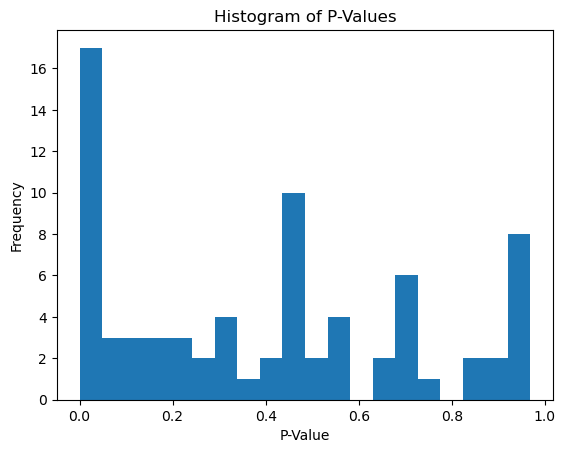

In [85]:
# Get p-values and create a histogram
p_values_new = model_new.pvalues[1:]  # Exclude the constant term
plt.hist(p_values, bins=20)
plt.title('Histogram of P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

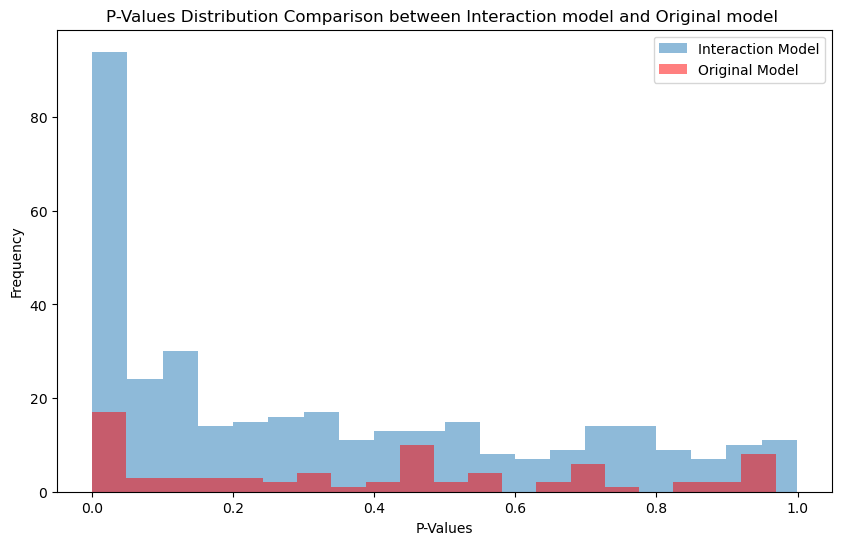

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(p_values_new,bins=20,label='Interaction Model',alpha=0.5)
plt.hist(p_values,bins=20,color='Red',label='Original Model',alpha=0.5)
plt.title('P-Values Distribution Comparison between Interaction model and Original model ')
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [87]:
alpha_threshold_new = fdr(p_values_new, q=0.1)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 74


In [88]:
alpha_threshold_new = fdr(p_values_new, q=0.15)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 86


In [89]:
alpha_threshold_new = fdr(p_values_new, q=0.2)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 96


In [90]:
alpha_threshold_new = fdr(p_values_new, q=0.25)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 104


In [91]:
alpha_threshold_new = fdr(p_values_new, q=0.3)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 118


In [92]:
alpha_threshold_new = fdr(p_values_new, q=0.35)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 147


In [93]:
alpha_threshold_new = fdr(p_values_new, q=0.4)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 158


In [94]:
alpha_threshold_new = fdr(p_values_new, q=0.45)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 169


In [95]:
alpha_threshold_new = fdr(p_values_new, q=0.5)
lst = [i for i in p_values_new if i <= alpha_threshold_new]
print('Number of True Discoveries:', len(lst))

Number of True Discoveries: 178


In [96]:
data = {'Alpha': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],
        'Number of True Discoveries': [74,86,96,104,118,147,158,169,178]}
Senstivity_New = pd.DataFrame(data)
Senstivity_New

,Alpha,Number of True Discoveries
0,0.10,74
1,0.15,86
2,0.20,96
3,0.25,104
4,0.30,118
5,0.35,147
6,0.40,158
7,0.45,169
8,0.50,178


From the above table, we can see that the Interaction model resulted in a incredibly increase in the number of true discoveries compared to that of the original model.
Interaction terms are having complex relationships between the variables that was not observed in the original model.

For the similar alpha values, indicating that the threshold value for a statistically significant result is the same, including the interaction terms led to a greater proportion of tests being considered significant controlling the FDR at the same level.